# DS6040 Project: Climate Change Analysis  
#### Abigail Snyder, Elena Tsvetkova, Suraj Kunthu

## Introduction

The purpose of this analysis is to discover demographic influences on opinions on climate change, in order to potentially inform strategies for education and policy as regards climate change and protecting the environment. 

## Climate Change Data

The chosen data set is survey data from Yale Program on Climate Change Communication & George Mason University Center for Climate Change Communication. The survey data catalogs American adults (age 18 and over) and their beliefs, attitudes, and policy opinions regarding global warming from 2008 through 2022. The data includes demographic data from the U.S. Census regarding gender, race and ethnicity, and level of education.  

All of the data is in categorical form and stored as a .SAV file. There is a Survey Methods pdf which functions as a codebook for the data.  

The total weighted sample size of the entire dataset is (n=30,136).  

There are 30,136 observations and 54 features. 

## Problem Statement

The key question which we aimed to answer in this study is: **What is the probability that demographic data, such as income, age, gender, and education determines opinions on climate change?**

## Methods & Approach

We started by importing the data and doing some exploratory data analysis, which led us to make a few conclusions:

In [1]:
import pyreadstat
import pandas as pd
from ydata_profiling import ProfileReport
import sidetable
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\elena\anaconda3\envs\ds6040\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Exploratory Data Analysis

In [2]:
df = pd.read_spss('spssdata.sav')

In [3]:
df.head()

case_ID      wave  year  weight_wave  weight_aggregate   happening  \
0      2.0  Nov 2008  2008         0.54          0.269626         Yes   
1      3.0  Nov 2008  2008         0.85          0.424411  Don't know   
2      5.0  Nov 2008  2008         0.49          0.244660  Don't know   
3      6.0  Nov 2008  2008         0.29          0.144799         Yes   
4      7.0  Nov 2008  2008         1.29          0.644106         Yes   

                                      cause_original cause_other_text  \
0                  Caused mostly by human activities                    
1                  Caused mostly by human activities                    
2  Caused mostly by natural changes in the enviro...                    
3  Caused mostly by natural changes in the enviro...                    
4                  Caused mostly by human activities                    

                                       cause_recoded  \
0                  Caused mostly by human activities   
1                  Caused mostly by human activities   
2  Caused mostly by natural changes in the enviro...   
3  Caused mostly by natural changes in the enviro...   
4                  Caused mostly by human activities   

                                       sci_consensus  ...  \
0  Most scientists think global warming is happening  ...   
1                           Don't know enough to say  ...   
2  There is a lot of disagreement among scientist...  ...   
3  Most scientists think global warming is happening  ...   
4  There is a lot of disagreement among scientist...  ...   

                       employment             house_head house_size  \
0           Not working - retired  Not head of household        3.0   
1          Not working - disabled      Head of household        2.0   
2  Not working - looking for work      Head of household        2.0   
3           Not working - retired      Head of household        2.0   
4    Working - as a paid employee      Head of household        2.0   

  house_ages0to1 house_ages2to5 house_ages6to12 house_ages13to17  \
0            0.0            0.0             0.0              0.0   
1            0.0            0.0             0.0              0.0   
2            0.0            0.0             0.0              0.0   
3            0.0            0.0             0.0              0.0   
4            0.0            0.0             0.0              0.0   

  house_ages18plus                                      house_type  \
0              3.0  One-family house detached from any other house   
1              2.0                                     Mobile home   
2              2.0  One-family house detached from any other house   
3              2.0  One-family house detached from any other house   
4              2.0  One-family house detached from any other house   

                                   house_own  
0  Owned by you or someone in your household  
1                                     Rented  
2  Owned by you or someone in your household  
3  Owned by you or someone in your household  
4  Owned by you or someone in your household  

[5 rows x 54 columns]

In [4]:
df.columns

Index(['case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening', 'cause_original', 'cause_other_text', 'cause_recoded',
       'sci_consensus', 'worry', 'harm_personally', 'harm_US',
       'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals',
       'when_harm_US', 'reg_CO2_pollutant', 'reg_utilities', 'fund_research',
       'reg_coal_emissions', 'discuss_GW', 'hear_GW_media', 'gender', 'age',
       'age_category', 'generation', 'educ', 'educ_category', 'income',
       'income_category', 'race', 'ideology', 'party', 'party_w_leaners',
       'party_x_ideo', 'registered_voter', 'region9', 'region4', 'religion',
       'religion_other_nonchristian', 'evangelical', 'service_attendance',
       'marit_status', 'employment', 'house_head', 'house_size',
       'house_ages0to1', 'house_ages2to5', 'house_ages6to12',
       'house_ages13to17', 'house_ages18plus', 'house_type', 'house_own'],
      dtype='object')

In [5]:
df.weight_wave

0        0.5400
1        0.8500
2        0.4900
3        0.2900
4        1.2900
          ...  
30131    1.4848
30132    0.8351
30133    1.0979
30134    0.6474
30135    0.7348
Name: weight_wave, Length: 30136, dtype: float64

In [6]:
df.stb.freq(['party'])

party  count    percent  cumulative_count  \
0                             Democrat   9903  32.861030              9903   
1                           Republican   8336  27.661269             18239   
2                          Independent   7737  25.673613             25976   
3  No party/not interested in politics   2992   9.928325             28968   
4               Other; Please specify:    859   2.850411             29827   
5                              Refused    309   1.025352             30136   

   cumulative_percent  
0           32.861030  
1           60.522299  
2           86.195912  
3           96.124237  
4           98.974648  
5          100.000000

In [7]:
df.stb.freq(['income_category'])

income_category  count    percent  cumulative_count  cumulative_percent
0   Less than $50,000  10953  36.345235             10953           36.345235
1  $50,000 to $99,999  10107  33.537961             21060           69.883196
2    $100,000 or more   9076  30.116804             30136          100.000000

In [8]:
df.stb.freq(['happening'])

happening  count    percent  cumulative_count  cumulative_percent
0         Yes  20438  67.819220             20438           67.819220
1  Don't know   4935  16.375763             25373           84.194983
2          No   4689  15.559464             30062           99.754447
3     Refused     74   0.245553             30136          100.000000

In [9]:
pd.Series(df[['happening','weight_wave']].groupby('happening').sum()['weight_wave'])/df['weight_wave'].sum()

happening
Don't know    0.171526
No            0.144361
Refused       0.002745
Yes           0.681367
Name: weight_wave, dtype: float64

In [10]:
#profile= ProfileReport(df, 
#                        title='Pandas Profiling Report',
#                        html={'style':{'full_width':True}},
#                       minimal=False)
#profile.to_notebook_iframe()

In [11]:
(pd.crosstab(df.income_category, df.happening, normalize='columns')*100).round(2)

happening           Don't know     No  Refused    Yes
income_category                                      
$100,000 or more         23.83  29.94    20.27  31.71
$50,000 to $99,999       32.32  36.08    29.73  33.26
Less than $50,000        43.85  33.97    50.00  35.03

In [12]:
(pd.crosstab(df.party, df.happening, normalize='columns')*100).round(2)

happening                            Don't know     No  Refused    Yes
party                                                                 
Democrat                                  19.31   6.72    12.16  42.21
Independent                               23.99  24.82    10.81  26.33
No party/not interested in politics       17.63   6.40     8.11   8.89
Other; Please specify:                     2.31   5.61     2.70   2.35
Refused                                    1.50   0.92    56.76   0.73
Republican                                35.26  55.53     9.46  19.50

In [13]:
(pd.crosstab(df.ideology, df.happening, normalize='columns')*100).round(2)

happening                     Don't know     No  Refused    Yes
ideology                                                       
Moderate, middle of the road       42.82  22.18    17.57  43.19
Refused                             3.55   1.56    60.81   1.46
Somewhat conservative              29.60  37.21     9.46  16.74
Somewhat liberal                    7.15   4.07     2.70  23.63
Very conservative                  13.56  34.08     6.76   5.11
Very liberal                        3.32   0.90     2.70   9.86

In [14]:
df['happening'] = df['happening'].astype('category')
df['happening'] = df['happening'].cat.reorder_categories(['Yes', 
                                                            'No', 
                                                            "Don't know", 
                                                            'Refused'])
mybars = df.happening.value_counts().sort_index()
mybars


happening
Yes           20438
No             4689
Don't know     4935
Refused          74
Name: count, dtype: int64

Text(0.5, 1.0, 'Level of Agreement that Global Warming is Happening')

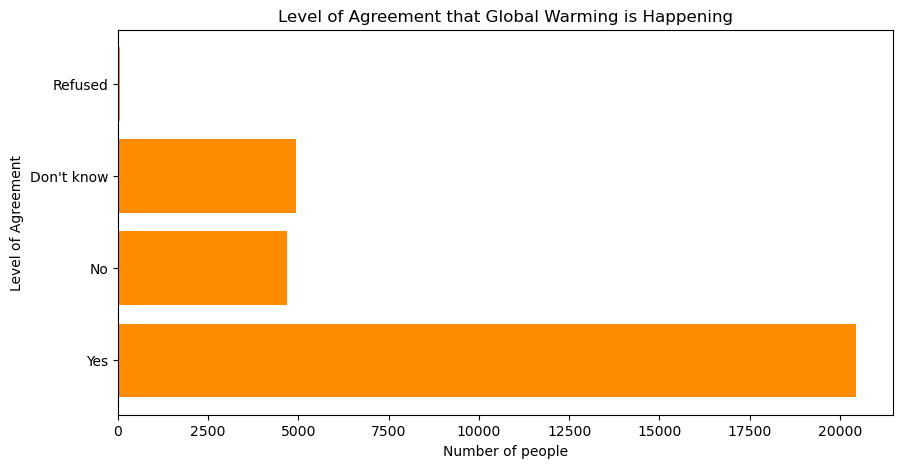

In [15]:
plt.figure(figsize=(10, 5))
plt.barh(mybars.index, mybars.values, color='darkorange')
plt.ylabel('Level of Agreement')
plt.xlabel('Number of people')
plt.title('Level of Agreement that Global Warming is Happening')

In [16]:
df['worry'] = df['worry'].astype('category')
df['worry'] = df['worry'].cat.reorder_categories(['Very worried', 
                                                  'Somewhat worried', 
                                                  'Not very worried', 
                                                  'Not at all worried',
                                                  'Refused'])
mybars = df.worry.value_counts().sort_index()
mybars


worry
Very worried           5531
Somewhat worried      11844
Not very worried       7626
Not at all worried     5052
Refused                  83
Name: count, dtype: int64

Text(0.5, 1.0, 'Level of Worry about Global Warmning')

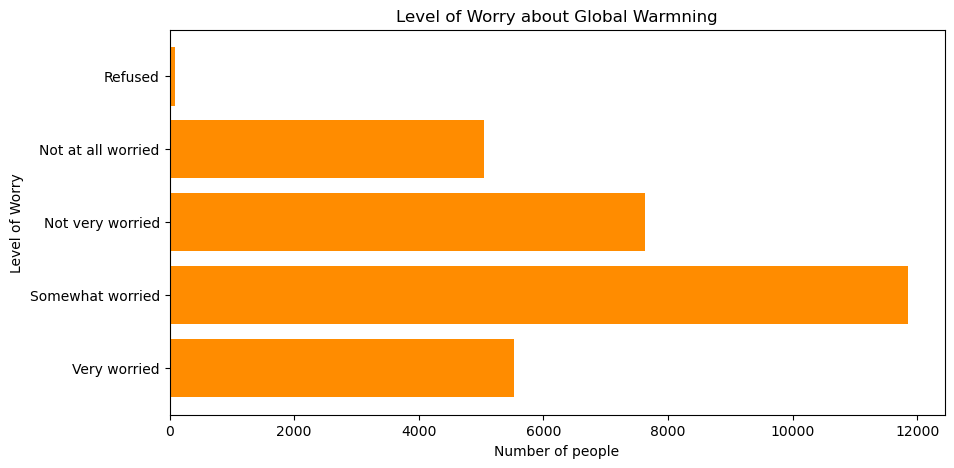

In [17]:
plt.figure(figsize=(10, 5))
plt.barh(mybars.index, mybars.values, color='darkorange')
plt.ylabel('Level of Worry')
plt.xlabel('Number of people')
plt.title('Level of Worry about Global Warmning')

### Preliminary Thoughts

Based on the exploratory data analysis, we decided to start by creating a model with `happening` as the response variable, and to trim down the predictor variables to those we are most interested in: `gender`, `age_category`, `educ_category`, `income_category`, `race`, `ideology`, `party`, `region4`, `religion`, and `marit_status`.  

`happening` contains four categories: 'Yes', 'No', 'Don't Know,' and 'Refused.' In order to create a binary response variable, we considered dropping 'Refused,' and potentially combining 'No' and 'Don't Know'. Before doing this, we wanted to explore the options for doing logistic regression with more than two categories in the response variable.  

If we have time, we would like to compare this with a second model using the same predictor variables, but with the response variable `worry`. 

In [18]:
df2 = df[['happening', 'gender', 'age_category', 'educ_category', 'income_category', 'race', 'ideology', 'party', 'region4', 'religion', 'marit_status']]

In [19]:
df2.head()

happening  gender age_category                educ_category  \
0         Yes  Female    55+ years                  High school   
1  Don't know    Male  35-54 years        Less than high school   
2  Don't know  Female  35-54 years  Bachelor's degree or higher   
3         Yes    Male    55+ years  Bachelor's degree or higher   
4         Yes  Female  18-34 years                 Some college   

      income_category                 race                      ideology  \
0  $50,000 to $99,999  White, Non-Hispanic         Somewhat conservative   
1   Less than $50,000  White, Non-Hispanic  Moderate, middle of the road   
2   Less than $50,000             Hispanic         Somewhat conservative   
3    $100,000 or more  White, Non-Hispanic         Somewhat conservative   
4  $50,000 to $99,999  White, Non-Hispanic         Somewhat conservative   

                                 party  region4  \
0                           Republican    South   
1  No party/not interested in politics  Midwest   
2                           Republican     West   
3                          Independent    South   
4                           Republican    South   

                                            religion   marit_status  
0  Protestant (e.g., Methodist, Lutheran, Presbyt...        Widowed  
1  Protestant (e.g., Methodist, Lutheran, Presbyt...  Never married  
2                                             Mormon        Married  
3  Protestant (e.g., Methodist, Lutheran, Presbyt...        Married  
4                         Baptist - any denomination        Married

In [20]:
#drop rows with NA values
df2 = df2.dropna(axis=0)

In [21]:
df3 = df[['worry', 'gender', 'age_category', 'educ_category', 'income_category', 'race', 'ideology', 'party', 'region4', 'religion', 'marit_status']]

In [22]:
df3.head()

worry  gender age_category                educ_category  \
0    Somewhat worried  Female    55+ years                  High school   
1    Not very worried    Male  35-54 years        Less than high school   
2  Not at all worried  Female  35-54 years  Bachelor's degree or higher   
3    Somewhat worried    Male    55+ years  Bachelor's degree or higher   
4    Somewhat worried  Female  18-34 years                 Some college   

      income_category                 race                      ideology  \
0  $50,000 to $99,999  White, Non-Hispanic         Somewhat conservative   
1   Less than $50,000  White, Non-Hispanic  Moderate, middle of the road   
2   Less than $50,000             Hispanic         Somewhat conservative   
3    $100,000 or more  White, Non-Hispanic         Somewhat conservative   
4  $50,000 to $99,999  White, Non-Hispanic         Somewhat conservative   

                                 party  region4  \
0                           Republican    South   
1  No party/not interested in politics  Midwest   
2                           Republican     West   
3                          Independent    South   
4                           Republican    South   

                                            religion   marit_status  
0  Protestant (e.g., Methodist, Lutheran, Presbyt...        Widowed  
1  Protestant (e.g., Methodist, Lutheran, Presbyt...  Never married  
2                                             Mormon        Married  
3  Protestant (e.g., Methodist, Lutheran, Presbyt...        Married  
4                         Baptist - any denomination        Married

### Model-Building

With this in mind, we started with the model-building process, working our way through several different models and comparing them to see what would be the best fit for the data. 

#### Question 1: What is the probability that certain demographic markers affect a person's belief that global warming is happening?

#### Model One: One-Hot Encoding 
The first model attempted to use one-hot encoding to create dummy variables to allow for the four categories within the response variable `happening`. 

In [24]:
one_hot_encoded_data = pd.get_dummies(df2, columns = ['happening'])
one_hot_encoded_data.head()

gender age_category                educ_category     income_category  \
0  Female    55+ years                  High school  $50,000 to $99,999   
1    Male  35-54 years        Less than high school   Less than $50,000   
2  Female  35-54 years  Bachelor's degree or higher   Less than $50,000   
3    Male    55+ years  Bachelor's degree or higher    $100,000 or more   
4  Female  18-34 years                 Some college  $50,000 to $99,999   

                  race                      ideology  \
0  White, Non-Hispanic         Somewhat conservative   
1  White, Non-Hispanic  Moderate, middle of the road   
2             Hispanic         Somewhat conservative   
3  White, Non-Hispanic         Somewhat conservative   
4  White, Non-Hispanic         Somewhat conservative   

                                 party  region4  \
0                           Republican    South   
1  No party/not interested in politics  Midwest   
2                           Republican     West   
3                          Independent    South   
4                           Republican    South   

                                            religion   marit_status  \
0  Protestant (e.g., Methodist, Lutheran, Presbyt...        Widowed   
1  Protestant (e.g., Methodist, Lutheran, Presbyt...  Never married   
2                                             Mormon        Married   
3  Protestant (e.g., Methodist, Lutheran, Presbyt...        Married   
4                         Baptist - any denomination        Married   

   happening_Yes  happening_No  happening_Don't know  happening_Refused  
0           True         False                 False              False  
1          False         False                  True              False  
2          False         False                  True              False  
3           True         False                 False              False  
4           True         False                 False              False

In [25]:
# importing libraries
from sklearn.preprocessing import OneHotEncoder 

In [36]:
df2.head(5)

happening  gender age_category                educ_category  \
0         Yes  Female    55+ years                  High school   
1  Don't know    Male  35-54 years        Less than high school   
2  Don't know  Female  35-54 years  Bachelor's degree or higher   
3         Yes    Male    55+ years  Bachelor's degree or higher   
4         Yes  Female  18-34 years                 Some college   

      income_category                 race                      ideology  \
0  $50,000 to $99,999  White, Non-Hispanic         Somewhat conservative   
1   Less than $50,000  White, Non-Hispanic  Moderate, middle of the road   
2   Less than $50,000             Hispanic         Somewhat conservative   
3    $100,000 or more  White, Non-Hispanic         Somewhat conservative   
4  $50,000 to $99,999  White, Non-Hispanic         Somewhat conservative   

                                 party  region4  \
0                           Republican    South   
1  No party/not interested in politics  Midwest   
2                           Republican     West   
3                          Independent    South   
4                           Republican    South   

                                            religion   marit_status  happ_cat  
0  Protestant (e.g., Methodist, Lutheran, Presbyt...        Widowed         0  
1  Protestant (e.g., Methodist, Lutheran, Presbyt...  Never married         2  
2                                             Mormon        Married         2  
3  Protestant (e.g., Methodist, Lutheran, Presbyt...        Married         0  
4                         Baptist - any denomination        Married         0

In [26]:
# Assigning numerical values and storing it in another columns
df2['happ_cat'] = df2['happening'].cat.codes
  
# Create an instance of One-hot-encoder
enc = OneHotEncoder()
  
# Passing encoded columns 
enc_data = pd.DataFrame(enc.fit_transform(
    df2[['happ_cat']]).toarray())
  
# Merge with main
df2_new = df2.join(enc_data)
  
df2_new.head()

happening  gender age_category                educ_category  \
0         Yes  Female    55+ years                  High school   
1  Don't know    Male  35-54 years        Less than high school   
2  Don't know  Female  35-54 years  Bachelor's degree or higher   
3         Yes    Male    55+ years  Bachelor's degree or higher   
4         Yes  Female  18-34 years                 Some college   

      income_category                 race                      ideology  \
0  $50,000 to $99,999  White, Non-Hispanic         Somewhat conservative   
1   Less than $50,000  White, Non-Hispanic  Moderate, middle of the road   
2   Less than $50,000             Hispanic         Somewhat conservative   
3    $100,000 or more  White, Non-Hispanic         Somewhat conservative   
4  $50,000 to $99,999  White, Non-Hispanic         Somewhat conservative   

                                 party  region4  \
0                           Republican    South   
1  No party/not interested in politics  Midwest   
2                           Republican     West   
3                          Independent    South   
4                           Republican    South   

                                            religion   marit_status  happ_cat  \
0  Protestant (e.g., Methodist, Lutheran, Presbyt...        Widowed         0   
1  Protestant (e.g., Methodist, Lutheran, Presbyt...  Never married         2   
2                                             Mormon        Married         2   
3  Protestant (e.g., Methodist, Lutheran, Presbyt...        Married         0   
4                         Baptist - any denomination        Married         0   

     0    1    2    3  
0  1.0  0.0  0.0  0.0  
1  0.0  0.0  1.0  0.0  
2  0.0  0.0  1.0  0.0  
3  1.0  0.0  0.0  0.0  
4  1.0  0.0  0.0  0.0

In [40]:
df2_new['happ_cat'].value_counts()

happ_cat
0    18237
2     4521
1     4243
3       74
Name: count, dtype: int64

In [41]:
df2_new['happening'].value_counts()

happening
Yes           18237
Don't know     4521
No             4243
Refused          74
Name: count, dtype: int64

In [27]:
#initial attempt to use Bambi...

In [28]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [29]:
az.style.use("arviz-darkgrid")
random_seed = 1234

In [91]:
df3 = df2_new.rename(columns={0: 'yes', 1:'no',2:'dont_know',3:'refuse'}) 

In [93]:
df3.head(3)

happening  gender age_category                educ_category  \
0         Yes  Female    55+ years                  High school   
1  Don't know    Male  35-54 years        Less than high school   
2  Don't know  Female  35-54 years  Bachelor's degree or higher   

      income_category                 race                      ideology  \
0  $50,000 to $99,999  White, Non-Hispanic         Somewhat conservative   
1   Less than $50,000  White, Non-Hispanic  Moderate, middle of the road   
2   Less than $50,000             Hispanic         Somewhat conservative   

                                 party  region4  \
0                           Republican    South   
1  No party/not interested in politics  Midwest   
2                           Republican     West   

                                            religion   marit_status  happ_cat  \
0  Protestant (e.g., Methodist, Lutheran, Presbyt...        Widowed         0   
1  Protestant (e.g., Methodist, Lutheran, Presbyt...  Never married         2   
2                                             Mormon        Married         2   

   yes   no  dont_know  refuse  
0  1.0  0.0        0.0     0.0  
1  0.0  0.0        1.0     0.0  
2  0.0  0.0        1.0     0.0

In [94]:
df3['has_response'] = np.where(df3['refuse']==0, 1, 0)

In [95]:
df3.columns

Index(['happening', 'gender', 'age_category', 'educ_category',
       'income_category', 'race', 'ideology', 'party', 'region4', 'religion',
       'marit_status', 'happ_cat', 'yes', 'no', 'dont_know', 'refuse',
       'has_response'],
      dtype='object')

In [96]:
df3.dtypes

happening          category
gender             category
age_category       category
educ_category      category
income_category    category
race               category
ideology           category
party              category
region4            category
religion           category
marit_status       category
happ_cat               int8
yes                 float64
no                  float64
dont_know           float64
refuse              float64
has_response          int32
dtype: object

In [97]:
df3['yes'] = df3['yes'].astype(int)

In [99]:
df3.dtypes

happening          category
gender             category
age_category       category
educ_category      category
income_category    category
race               category
ideology           category
party              category
region4            category
religion           category
marit_status       category
happ_cat               int8
yes                   int32
no                  float64
dont_know           float64
refuse              float64
has_response          int32
dtype: object

In the end, this attempt was abandoned due to difficulty fitting the model and an inability to resolve coding errors. 

#### Model Two: Binomial Logistic Regression Model**  
The second model was a binomial logistic regression model, which split the response variable into two categories, either `yes` or `other response`.  

In [100]:
model1 = bmb.Model("p(yes,has_response) ~ gender + age_category + educ_category + income_category + race + ideology + party + region4 + religion + marit_status", 
                   data = df3, 
                   family="binomial")
model1

       Formula: p(yes,has_response) ~ gender + age_category + educ_category + income_category + race + ideology + party + region4 + religion + marit_status
        Family: binomial
          Link: p = logit
  Observations: 27075
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 9.3442)
            gender ~ Normal(mu: 0.0, sigma: 5.0002)
            age_category ~ Normal(mu: [0. 0.], sigma: [5.3094 5.0187])
            educ_category ~ Normal(mu: [0. 0. 0.], sigma: [5.5774 9.4886 5.4874])
            income_category ~ Normal(mu: [0. 0.], sigma: [5.2849 5.165 ])
            race ~ Normal(mu: [0. 0. 0.], sigma: [ 8.2573 10.1406  5.7301])
            ideology ~ Normal(mu: [0. 0. 0. 0. 0.], sigma: [17.8652  6.0244  6.4997  8.0116  9.6634])
            party ~ Normal(mu: [0. 0. 0. 0. 0.], sigma: [ 5.7462  8.2547 14.946  24.5817  5.6007])
            region4 ~ Normal(mu: [0. 0. 0.], sigma: [6.4684 5.2393 5.936 ])
            religion ~ 

In [101]:
results1 = model1.fit(random_seed=random_seed)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, gender, age_category, educ_category, income_category, race, ideology, party, region4, religion, marit_status]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 917 seconds.


mean     sd  hdi_3%  \
Intercept                                           2.468  0.139   2.212   
gender[Male]                                       -0.114  0.030  -0.170   
age_category[35-54 years]                           0.042  0.044  -0.040   
age_category[55+ years]                             0.085  0.047  -0.006   
educ_category[High school]                         -0.493  0.041  -0.567   
educ_category[Less than high school]               -0.647  0.062  -0.764   
educ_category[Some college]                        -0.303  0.038  -0.373   
income_category[$50,000 to $99,999]                -0.032  0.038  -0.097   
income_category[Less than $50,000]                 -0.087  0.042  -0.168   
race[Hispanic]                                      0.387  0.076   0.246   
race[Other, Non-Hispanic]                           0.280  0.083   0.127   
race[White, Non-Hispanic]                           0.154  0.059   0.047   
ideology[Refused]                                  -0.516  0.113  -0.732   
ideology[Somewhat conservative]                    -0.707  0.037  -0.777   
ideology[Somewhat liberal]                          0.738  0.053   0.640   
ideology[Very conservative]                        -1.411  0.049  -1.506   
ideology[Very liberal]                              0.712  0.081   0.554   
party[Independent]                                 -0.761  0.046  -0.848   
party[No party/not interested in politics]         -0.972  0.057  -1.074   
party[Other; Please specify:]                      -1.143  0.087  -1.299   
party[Refused]                                     -0.955  0.163  -1.263   
party[Republican]                                  -1.156  0.048  -1.245   
region4[Northeast]                                  0.112  0.046   0.025   
region4[South]                                      0.073  0.040   0.000   
region4[West]                                       0.106  0.046   0.020   
religion[Atheist (Apr 2014 on)]                     0.196  0.155  -0.078   
religion[Baptist - any denomination]               -0.738  0.113  -0.945   
religion[Buddhist]                                 -0.303  0.235  -0.769   
religion[Catholic]                                 -0.503  0.108  -0.706   
religion[Eastern Orthodox]                         -0.415  0.290  -0.952   
religion[Hindu]                                    -0.171  0.307  -0.697   
religion[Jewish]                                   -0.650  0.151  -0.940   
religion[Mormon]                                   -0.567  0.148  -0.836   
religion[Muslim]                                   -0.506  0.296  -1.096   
religion[None of the Above (Apr 2014 on); None ... -0.556  0.112  -0.749   
religion[Other - non-Christian (Please specify)]   -0.303  0.161  -0.597   
religion[Other Christian]                          -0.632  0.112  -0.845   
religion[Pentecostal]                              -0.718  0.134  -0.970   
religion[Protestant (e.g., Methodist, Lutheran,... -0.532  0.108  -0.737   
religion[Refused]                                  -0.984  0.174  -1.315   
marit_status[Living with partner]                  -0.017  0.081  -0.165   
marit_status[Married]                              -0.172  0.050  -0.259   
marit_status[Never married]                        -0.131  0.062  -0.243   
marit_status[Separated]                             0.002  0.122  -0.229   
marit_status[Widowed]                              -0.136  0.078  -0.287   

                                                    hdi_97%  mcse_mean  \
Intercept                                             2.731      0.003   
gender[Male]                                         -0.059      0.000   
age_category[35-54 years]                             0.123      0.001   
age_category[55+ years]                               0.170      0.001   
educ_category[High school]                           -0.416      0.001   
educ_category[Less than high school]                 -0.529      0.001   
educ_category[Some college]           

C:\Users\elena\anaconda3\envs\ds6040\lib\site-packages\IPython\core\events.py:93: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)


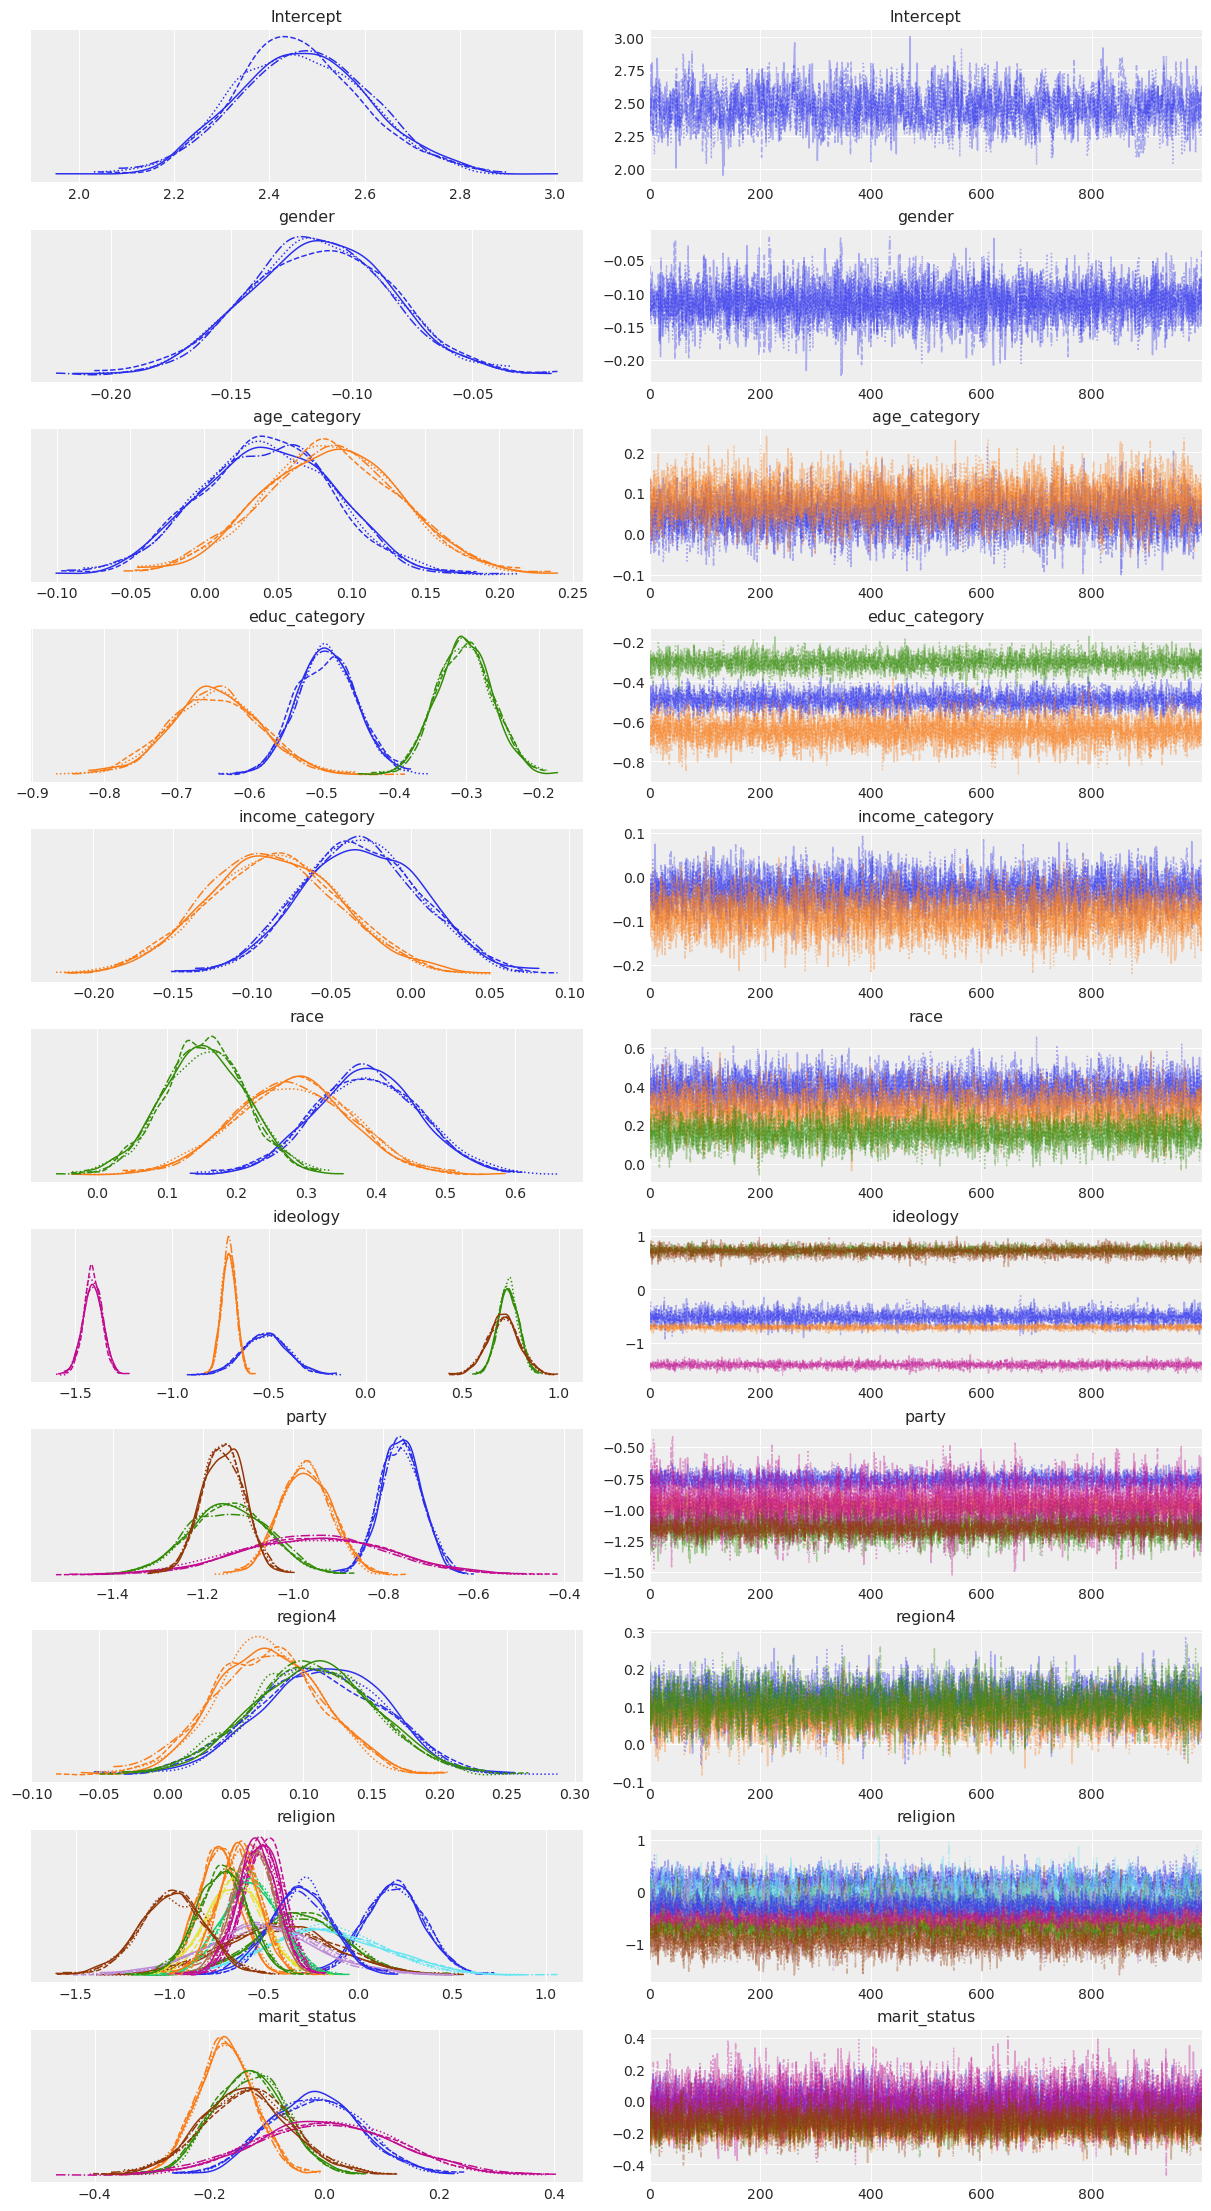

C:\Users\elena\anaconda3\envs\ds6040\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


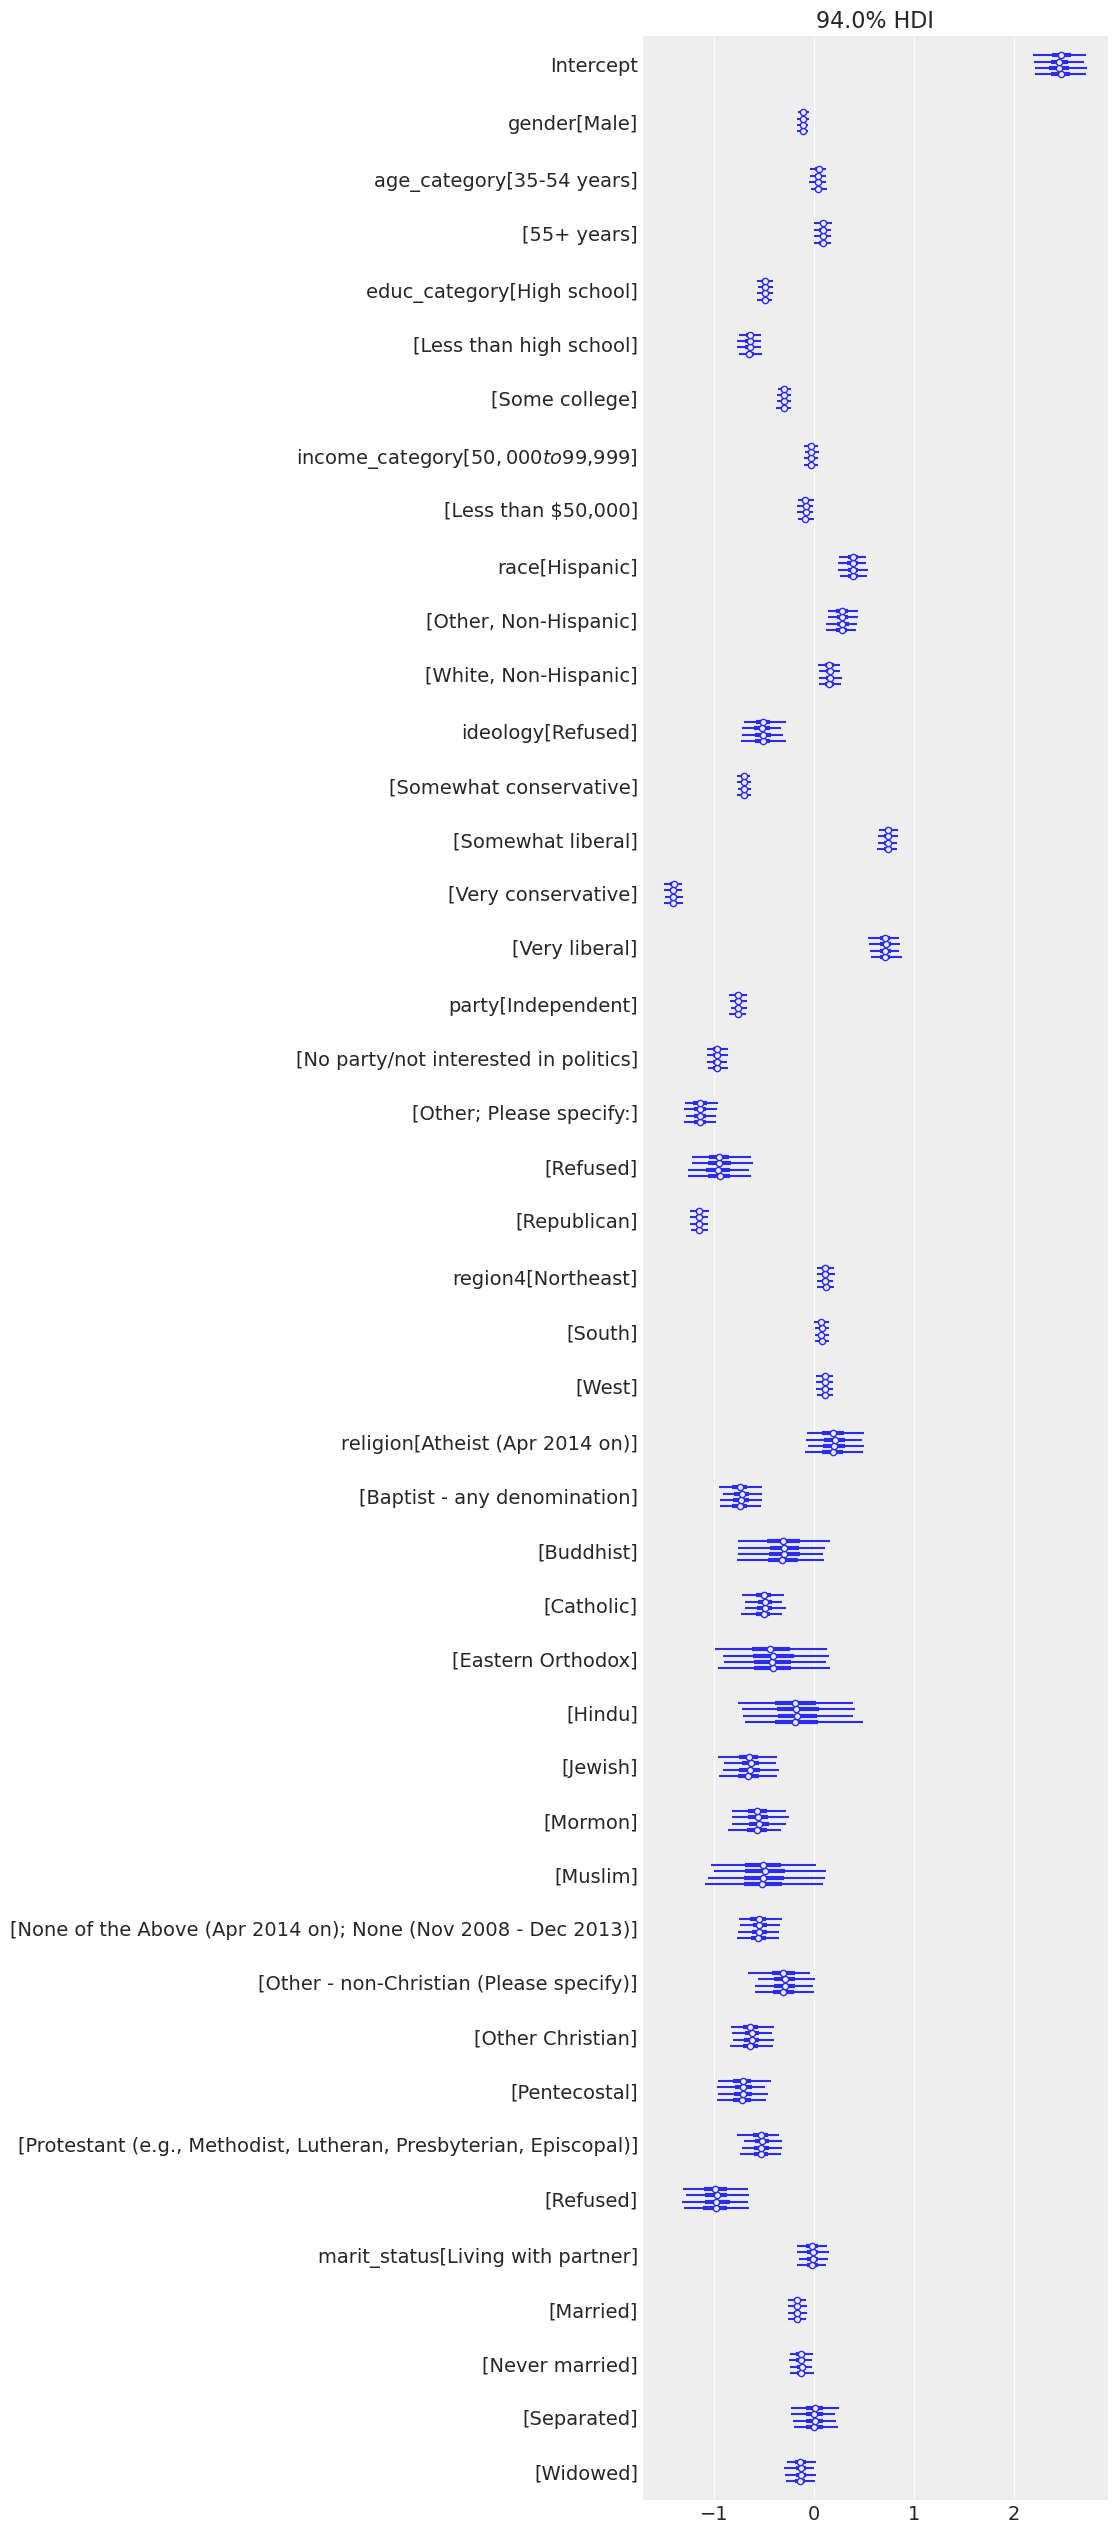

In [102]:
az.plot_trace(results1)
az.plot_forest(results1)
az.summary(results1)

*Add initial conclusions from this model here*

#### Model 3: Bernoulli Logistic Regression model  
The third model was a Bernoulli Logistic Regression model, chosen because.... *finish this*

In [103]:
model2 = bmb.Model("yes['1'] ~ gender + age_category + educ_category + inco        me_category + race + ideology + party + region4 + religion + marit_status", 
                   data = df3, 
                   family="bernoulli")
model2

       Formula: yes['1'] ~ gender + age_category + educ_category + income_category + race + ideology + party + region4 + religion + marit_status
        Family: bernoulli
          Link: p = logit
  Observations: 27075
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 9.3442)
            gender ~ Normal(mu: 0.0, sigma: 5.0002)
            age_category ~ Normal(mu: [0. 0.], sigma: [5.3094 5.0187])
            educ_category ~ Normal(mu: [0. 0. 0.], sigma: [5.5774 9.4886 5.4874])
            income_category ~ Normal(mu: [0. 0.], sigma: [5.2849 5.165 ])
            race ~ Normal(mu: [0. 0. 0.], sigma: [ 8.2573 10.1406  5.7301])
            ideology ~ Normal(mu: [0. 0. 0. 0. 0.], sigma: [17.8652  6.0244  6.4997  8.0116  9.6634])
            party ~ Normal(mu: [0. 0. 0. 0. 0.], sigma: [ 5.7462  8.2547 14.946  24.5817  5.6007])
            region4 ~ Normal(mu: [0. 0. 0.], sigma: [6.4684 5.2393 5.936 ])
            religion ~ Normal(mu:

In [104]:
results2 = model2.fit(random_seed=random_seed)

Modeling the probability that yes==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, gender, age_category, educ_category, income_category, race, ideology, party, region4, religion, marit_status]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 915 seconds.


mean     sd  hdi_3%  \
Intercept                                           2.464  0.138   2.227   
gender[Male]                                       -0.115  0.030  -0.173   
age_category[35-54 years]                           0.046  0.044  -0.038   
age_category[55+ years]                             0.095  0.046   0.009   
educ_category[High school]                         -0.498  0.041  -0.578   
educ_category[Less than high school]               -0.649  0.062  -0.773   
educ_category[Some college]                        -0.307  0.039  -0.383   
income_category[$50,000 to $99,999]                -0.030  0.038  -0.103   
income_category[Less than $50,000]                 -0.087  0.043  -0.167   
race[Hispanic]                                      0.386  0.075   0.238   
race[Other, Non-Hispanic]                           0.282  0.083   0.129   
race[White, Non-Hispanic]                           0.152  0.059   0.037   
ideology[Refused]                                  -0.568  0.112  -0.782   
ideology[Somewhat conservative]                    -0.705  0.038  -0.775   
ideology[Somewhat liberal]                          0.740  0.053   0.643   
ideology[Very conservative]                        -1.409  0.051  -1.503   
ideology[Very liberal]                              0.707  0.084   0.552   
party[Independent]                                 -0.758  0.045  -0.844   
party[No party/not interested in politics]         -0.965  0.056  -1.077   
party[Other; Please specify:]                      -1.145  0.088  -1.311   
party[Refused]                                     -1.154  0.157  -1.448   
party[Republican]                                  -1.152  0.047  -1.240   
region4[Northeast]                                  0.113  0.046   0.026   
region4[South]                                      0.075  0.039   0.003   
region4[West]                                       0.105  0.045   0.021   
religion[Atheist (Apr 2014 on)]                     0.198  0.151  -0.096   
religion[Baptist - any denomination]               -0.745  0.110  -0.956   
religion[Buddhist]                                 -0.306  0.240  -0.754   
religion[Catholic]                                 -0.508  0.105  -0.699   
religion[Eastern Orthodox]                         -0.409  0.279  -0.947   
religion[Hindu]                                    -0.177  0.299  -0.715   
religion[Jewish]                                   -0.650  0.146  -0.926   
religion[Mormon]                                   -0.565  0.143  -0.841   
religion[Muslim]                                   -0.514  0.289  -1.059   
religion[None of the Above (Apr 2014 on); None ... -0.559  0.108  -0.772   
religion[Other - non-Christian (Please specify)]   -0.302  0.157  -0.592   
religion[Other Christian]                          -0.631  0.108  -0.835   
religion[Pentecostal]                              -0.721  0.130  -0.968   
religion[Protestant (e.g., Methodist, Lutheran,... -0.540  0.105  -0.731   
religion[Refused]                                  -1.069  0.168  -1.371   
marit_status[Living with partner]                  -0.013  0.080  -0.166   
marit_status[Married]                              -0.172  0.049  -0.264   
marit_status[Never married]                        -0.134  0.060  -0.243   
marit_status[Separated]                             0.005  0.121  -0.220   
marit_status[Widowed]                              -0.134  0.080  -0.284   

                                                    hdi_97%  mcse_mean  \
Intercept                                             2.751      0.003   
gender[Male]                                         -0.061      0.000   
age_category[35-54 years]                             0.126      0.001   
age_category[55+ years]                               0.179      0.001   
educ_category[High school]                           -0.424      0.001   
educ_category[Less than high school]                 -0.539      0.001   
educ_category[Some college]           

C:\Users\elena\anaconda3\envs\ds6040\lib\site-packages\IPython\core\events.py:93: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)


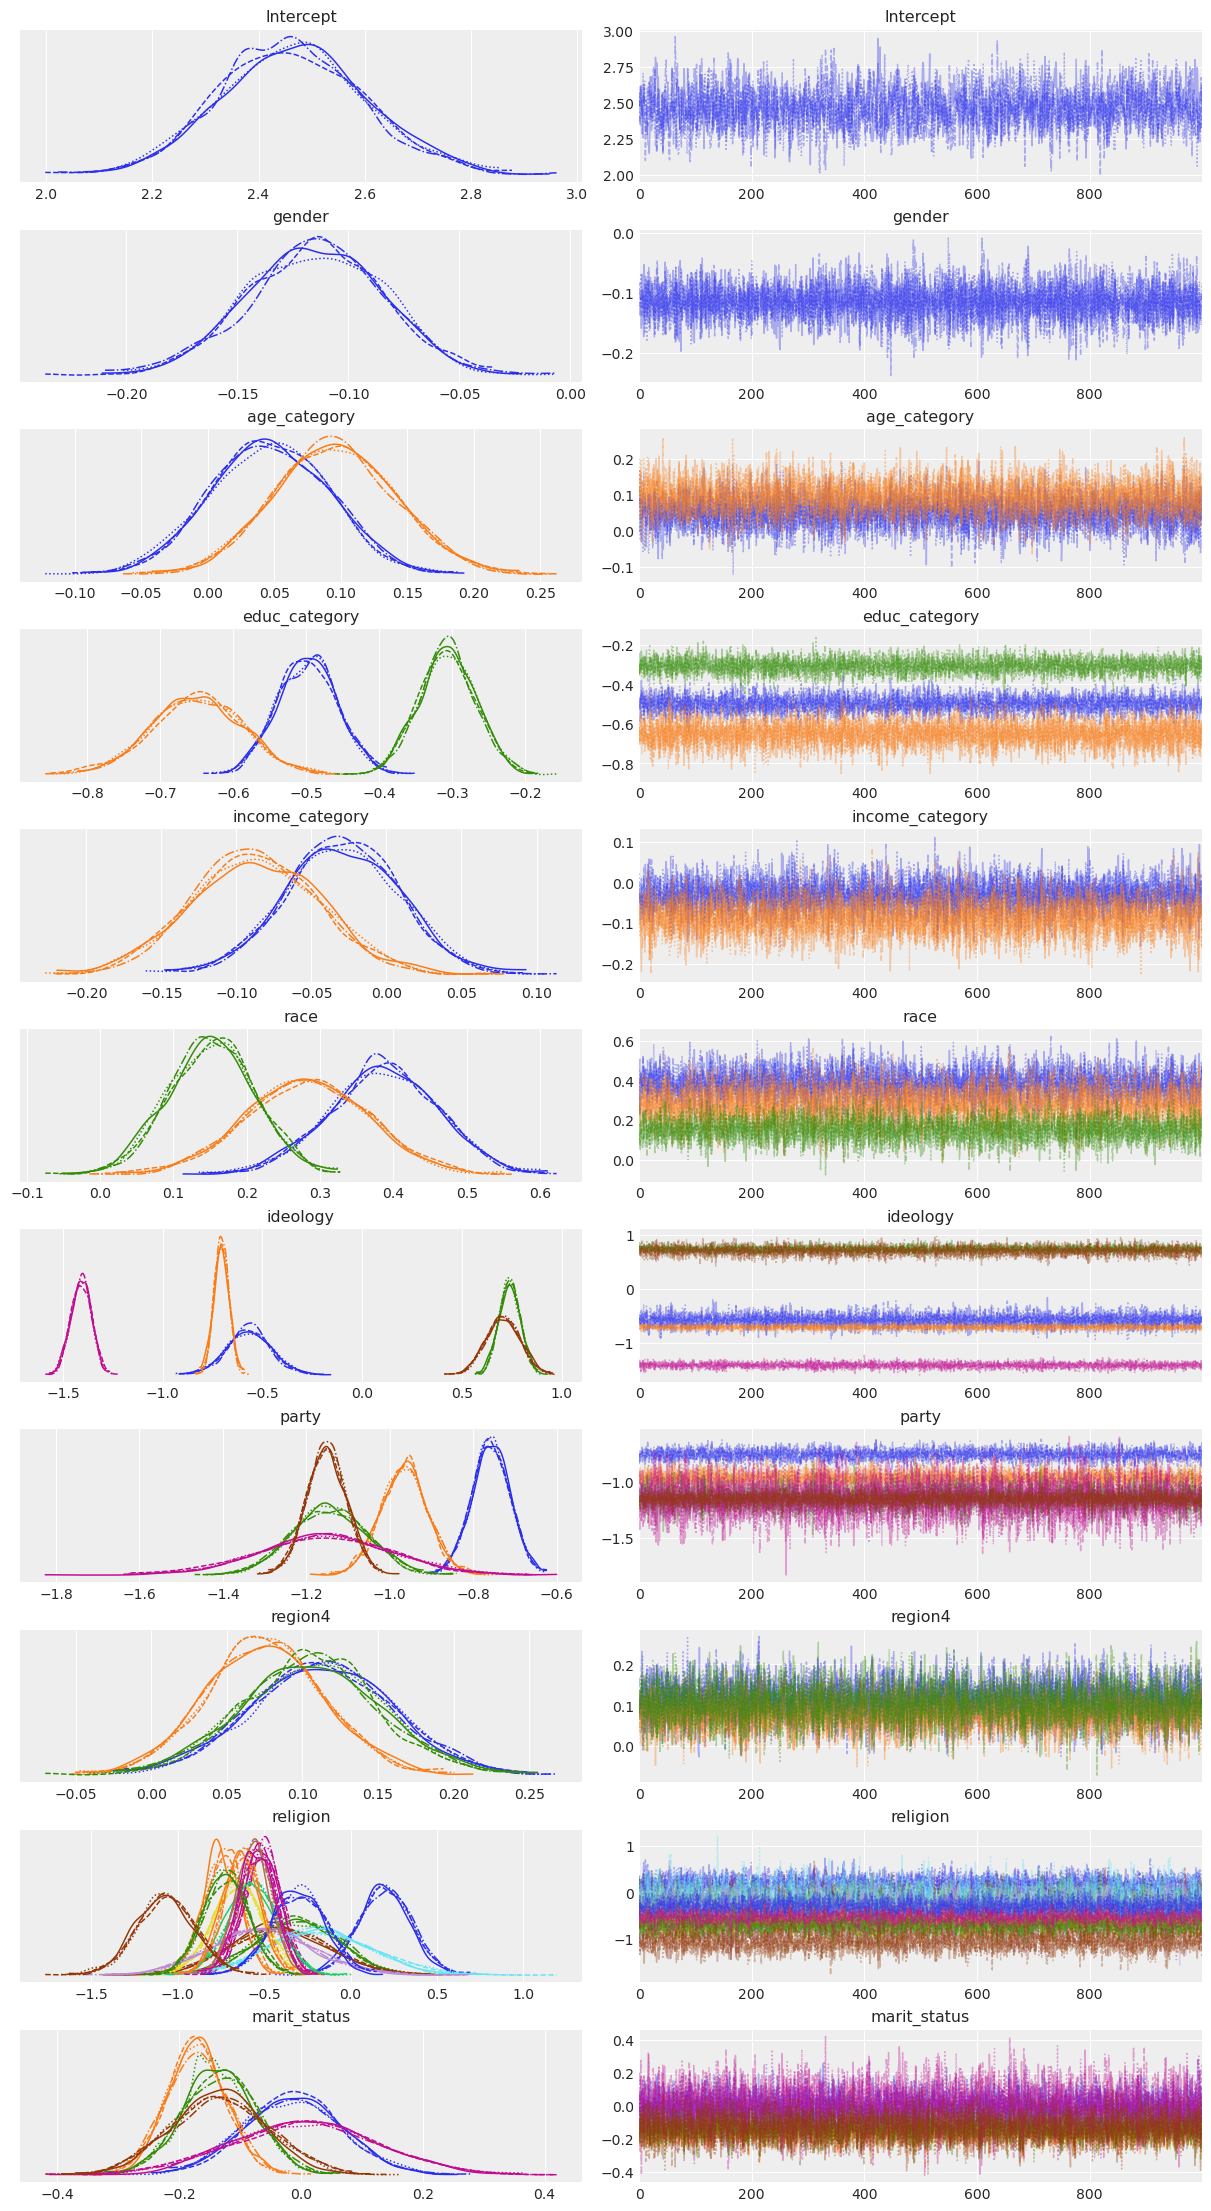

C:\Users\elena\anaconda3\envs\ds6040\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


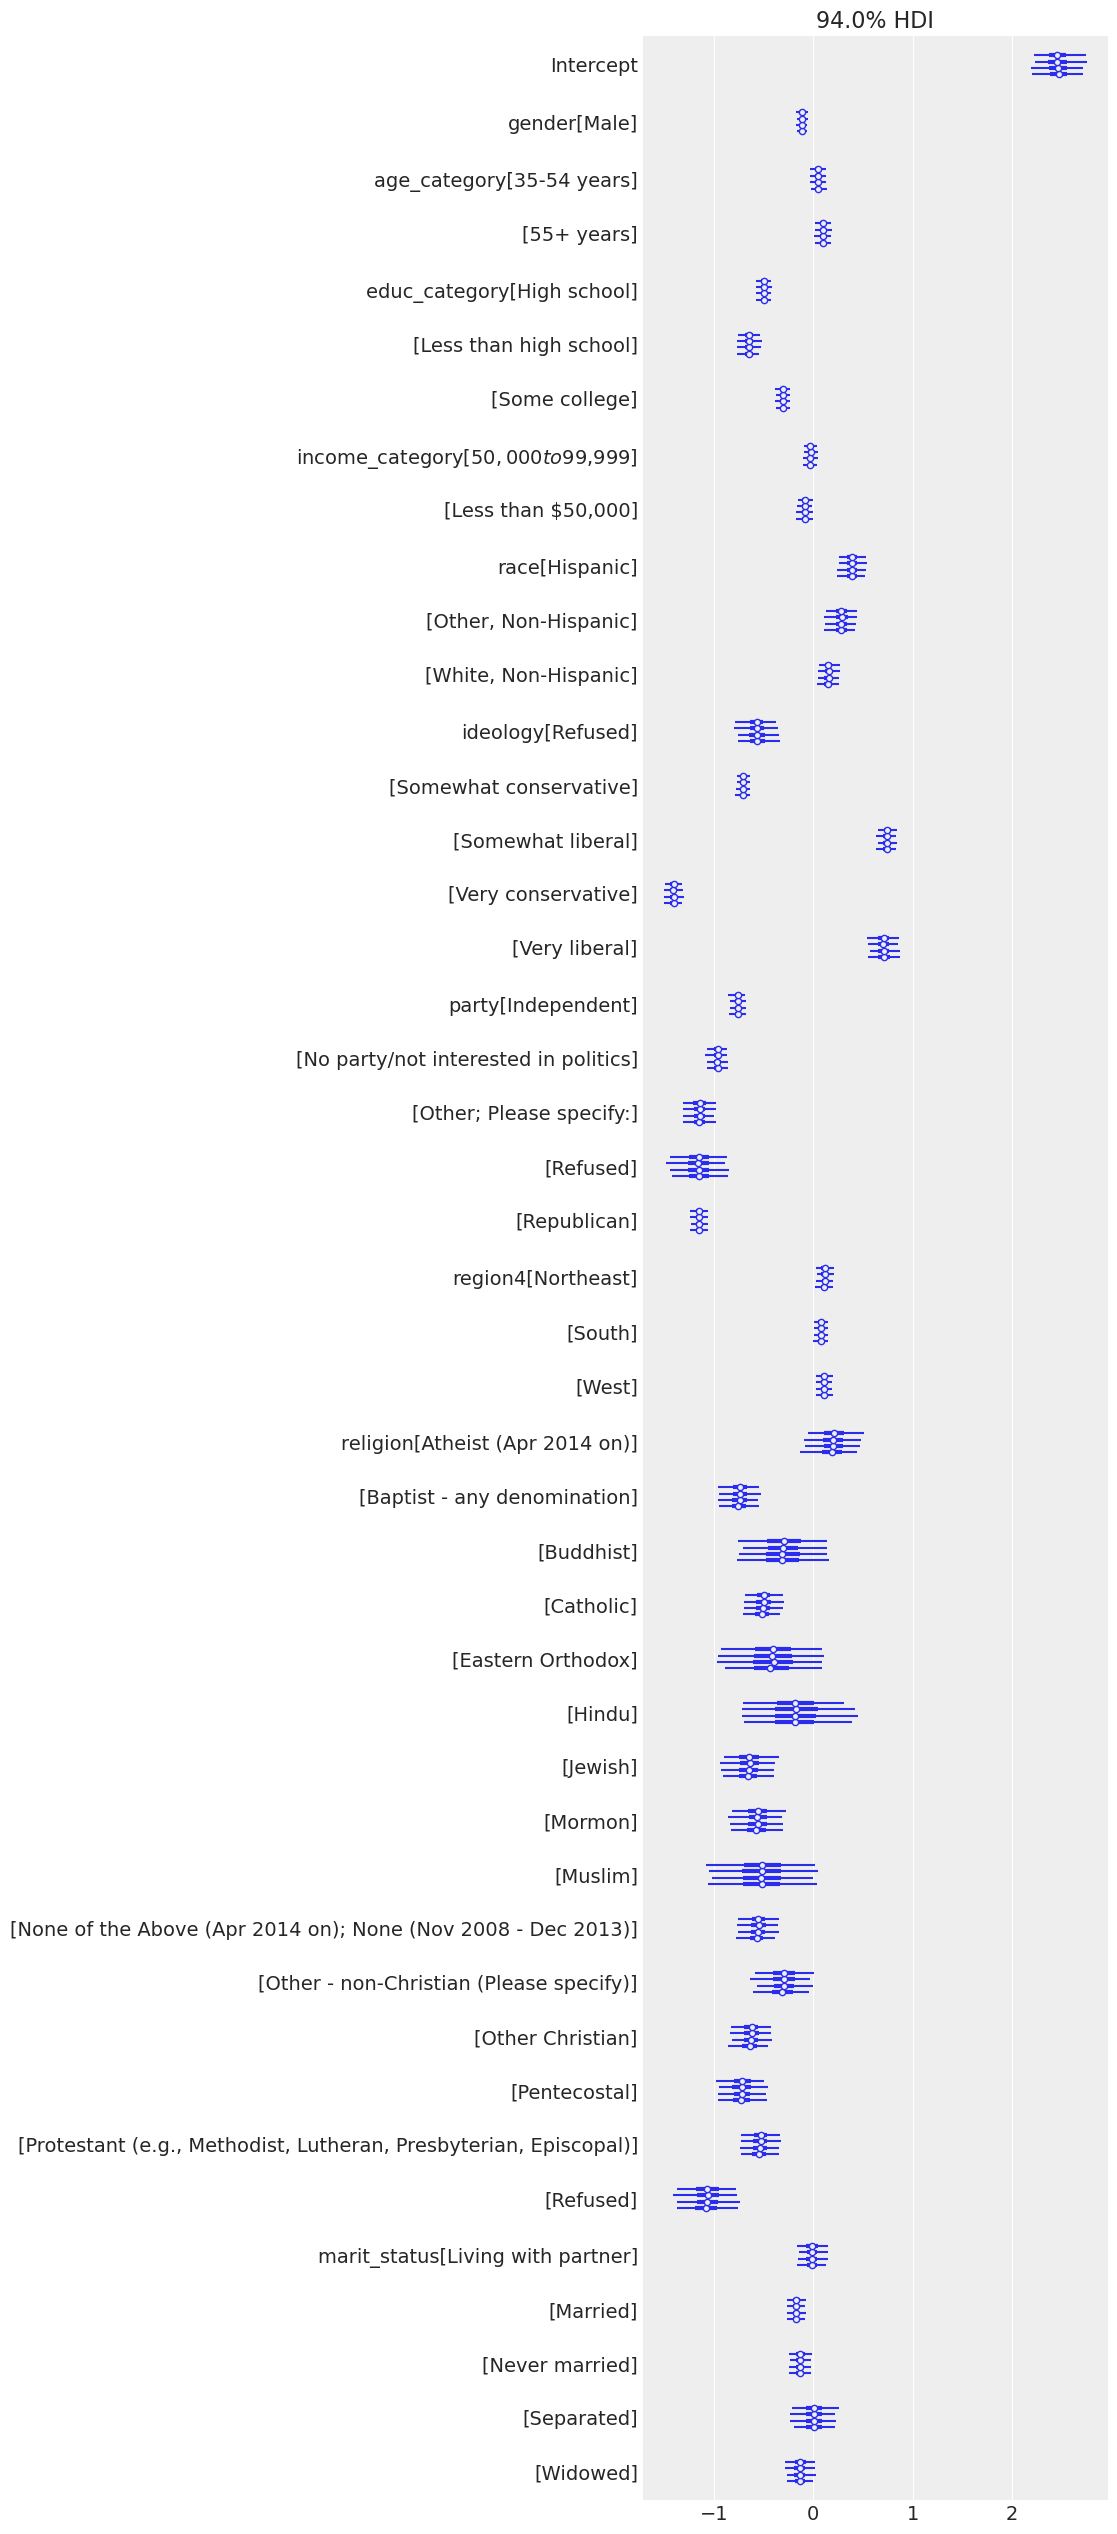

In [105]:
az.plot_trace(results2)
az.plot_forest(results2)
az.summary(results2)

In [ ]:
model3 = bmb.Model("happening ~ gender", 
                   data = df2_new, 
                   family="multinomial")

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept[1]    -0.301  0.031  -0.358   -0.242      0.001    0.000    3736.0   
Intercept[2]    -4.294  0.175  -4.637   -3.982      0.003    0.002    4484.0   
Intercept[3]     1.371  0.023   1.328    1.412      0.000    0.000    3840.0   
gender[1, Male]  0.452  0.042   0.373    0.531      0.001    0.000    3822.0   
gender[2, Male]  0.342  0.235  -0.093    0.792      0.003    0.003    4562.0   
gender[3, Male]  0.050  0.033  -0.011    0.113      0.001    0.000    3730.0   

                 ess_tail  r_hat  
Intercept[1]       3087.0    1.0  
Intercept[2]       3321.0    1.0  
Intercept[3]       3495.0    1.0  
gender[1, Male]    3295.0    1.0  
gender[2, Male]    3245.0    1.0  
gender[3, Male]    3036.0    1.0

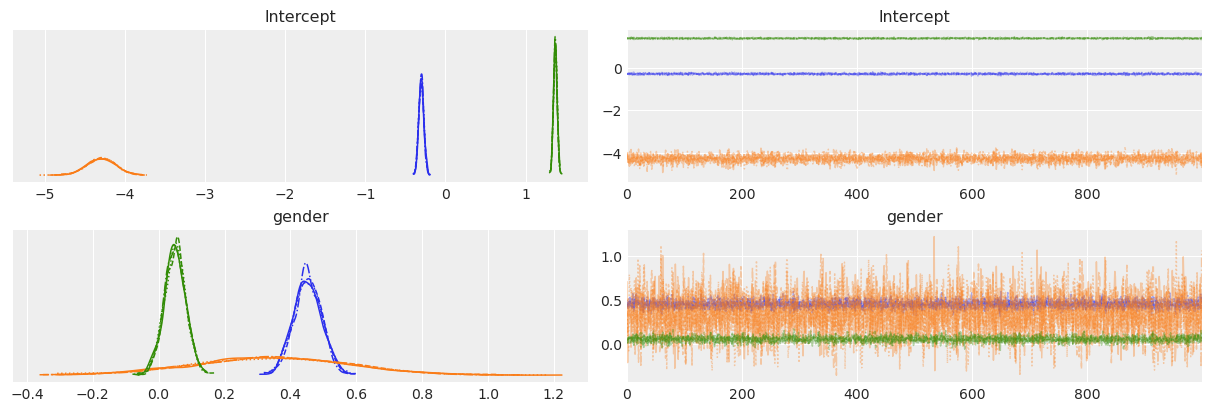

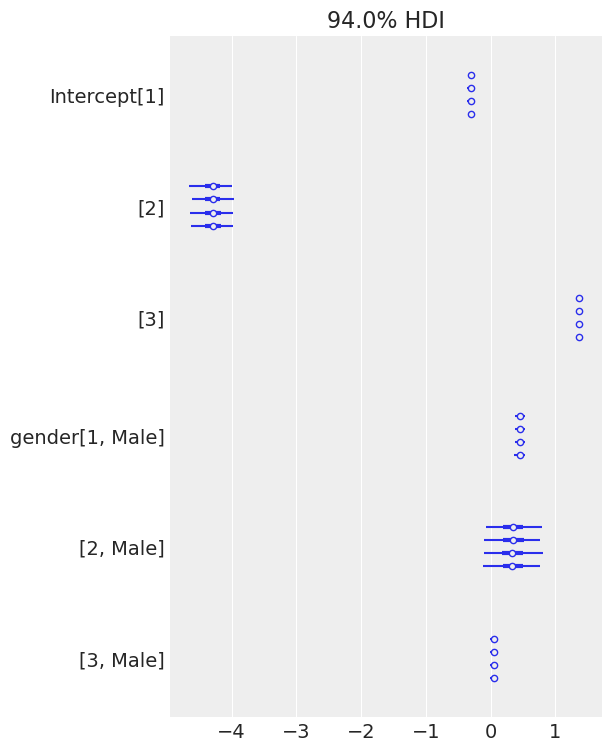

In [90]:
az.plot_trace(results3)
az.plot_forest(results3)
az.summary(results3)

In [88]:
#az.plot_trace(idata_model2, var_names=var_names, compact=False);

NameError: name 'var_names' is not defined

In [33]:
#model1.predict()

TypeError: Model.predict() missing 1 required positional argument: 'idata'

*add conclusions / initial thoughts from this model here*

## Findings

*add this*